<a href="https://colab.research.google.com/github/yaolihua081/Stanford-CS06dataviz/blob/main/lending_club_hw3_cs06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import tree 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import files
files.upload()

KeyboardInterrupt: ignored

In [ ]:
lc_data =  pd.read_csv('https://raw.githubusercontent.com/cjflanagan/cs68/master/lending_club_training_data_subset.csv')
lc_data.dropna(axis=1, inplace=True) # Dropping NANs

In [ ]:
lc_data =  pd.read_csv('https://raw.githubusercontent.com/cjflanagan/cs68/master/lending_club_training_data_subset.csv')

lc_train_data=pd.read_csv("lc_loan.csv")
lc_test_data=pd.read_csv("lc_2016_2017.csv")
lc_train_data.shape #887379, 74

lc_test_data.shape#759338, 72
lc_data.shape #20000,151

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19,55) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (18,54) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(20000, 151)

In [ ]:
lc_data.dropna(axis=1, inplace=True) # Dropping NANs

lc_test_data.dropna(axis=1, inplace=True) # Dropping NANs

lc_train_data.dropna(axis=1, inplace=True) # Dropping NANs

In [ ]:

lc_train_data.shape #887379, 34
#len(lc_train_data.columns) #90
#lc_test_data.shape #759338,41
#set(lc_train_data.columns).intersection (set(lc_test_data.columns))
lc_train_data.info()
lc_data.shape#200000,90

lc_data.info() #it has all the columns that train and test has and more
#for now, I will just work with it.

ML LR

In [ ]:
#define and label categories variables
def Convert_Numerical(col, dat):
  purpose_name=dat[col].unique()
  purpose_df=pd.DataFrame(purpose_name, columns=[col])
  labelencoder = LabelEncoder()
  name=col+'_types'
  purpose_df[name]=labelencoder.fit_transform(purpose_df[col])
  return purpose_df


purpose_df=Convert_Numerical('purpose', lc_data)
purpose_df

lc_data=pd.merge(lc_data, purpose_df, how='left')
verification_df=Convert_Numerical('verification_status', lc_data)
verification_df

lc_data=pd.merge(lc_data, verification_df, how='left')

application_df=Convert_Numerical('application_type', lc_data)
application_df

lc_data=pd.merge(lc_data, application_df, how='left')

application_df=Convert_Numerical('debt_settlement_flag', lc_data)
application_df
lc_data=pd.merge(lc_data, application_df, how='left')#debt_settlement_flag=N==0

application_df=Convert_Numerical('loan_status', lc_data)
application_df
lc_data=pd.merge(lc_data, application_df, how='left')#debt_settlement_flag=N==0
application_df=Convert_Numerical('loan_status', lc_data)#fully paid, 1,
application_df
lc_data=pd.merge(lc_data, application_df, how='left')#debt_settlement_flag=N==0
lc_data



,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,...,open_rv_24m,max_bal_bc,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag,purpose_types,verification_status_types,application_type_types,debt_settlement_flag_types,loan_status_types
0,65230,92451797,1.353367,26450.0,26450.0,60 months,18.99%,685.99,D,D3,RENT,-0.242860,Not Verified,Nov-2016,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,100xx,NY,2.0,Sep-2007,675.0,679.0,1.0,6.0,0.0,204.0,14.0,w,0.0,0.0,22329.530000,22329.53,9704.73,10188.98,0.0,2435.82,438.4476,1371.98,...,2.0,133.0,7300.0,1.0,0.0,2.0,3.0,1026.0,0.0,0.0,110.0,6.0,5.0,0.0,0.0,2.0,2.0,4.0,6.0,6.0,4.0,7.0,2.0,6.0,0.0,1.0,3.0,66.7,0.0,0.0,18914.0,6155.0,7300.0,11614.0,N,2,0,0,0,0
1,36521,94187830,-0.233683,12000.0,12000.0,36 months,11.44%,395.37,B,B4,RENT,0.133800,Source Verified,Nov-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,786xx,TX,0.0,Aug-2008,680.0,684.0,0.0,11.0,0.0,12855.0,18.0,w,0.0,0.0,12458.596524,12458.60,12000.00,458.60,0.0,0.00,0.0000,11280.12,...,4.0,3753.0,21700.0,0.0,7.0,0.0,5.0,3869.0,0.0,0.0,99.0,5.0,5.0,0.0,1.0,4.0,6.0,5.0,6.0,2.0,10.0,16.0,6.0,11.0,0.0,0.0,3.0,88.9,0.0,0.0,52683.0,38686.0,15000.0,30983.0,N,2,1,0,0,1
2,25712,93882482,-1.441818,1000.0,1000.0,36 months,15.99%,35.16,C,C5,RENT,0.219404,Source Verified,Dec-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,557xx,MN,0.0,Feb-1999,695.0,699.0,0.0,13.0,0.0,18157.0,27.0,w,0.0,0.0,1000.600733,1000.60,1000.00,0.60,0.0,0.00,0.0000,1002.38,...,1.0,5980.0,18300.0,0.0,2.0,0.0,2.0,4836.0,0.0,0.0,213.0,23.0,10.0,0.0,0.0,8.0,8.0,8.0,10.0,16.0,9.0,11.0,9.0,13.0,0.0,0.0,1.0,100.0,0.0,0.0,56789.0,62872.0,17800.0,38489.0,N,8,1,0,0,1
3,92973,91238602,-0.453344,10000.0,10000.0,36 months,10.99%,327.34,B,B4,RENT,-0.636641,Verified,Oct-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,224xx,VA,0.0,May-2005,680.0,684.0,0.0,10.0,0.0,6771.0,32.0,f,0.0,0.0,11778.122232,11778.12,10000.00,1778.12,0.0,0.00,0.0000,327.33,...,5.0,2300.0,15400.0,1.0,1.0,0.0,5.0,2895.0,0.0,0.0,122.0,4.0,4.0,2.0,0.0,4.0,5.0,5.0,10.0,14.0,9.0,15.0,5.0,10.0,0.0,0.0,2.0,93.5,0.0,0.0,42402.0,26059.0,7300.0,27002.0,N,1,2,0,0,1
4,16335,94465406,-1.057411,4500.0,4500.0,36 months,26.24%,181.89,E,E5,RENT,-0.807851,Verified,Dec-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,322xx,FL,0.0,Feb-2012,660.0,664.0,1.0,7.0,1.0,2483.0,7.0,f,0.0,0.0,6534.574960,6534.57,4500.00,2034.57,0.0,0.00,0.0000,181.54,...,3.0,236.0,4200.0,0.0,3.0,1.0,4.0,7191.0,0.0,0.0,31.0,2.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,3.0,4.0,4.0,4.0,7.0,0.0,0.0,1.0,85.7,0.0,0.0,54722.0,50339.0,300.0,50522.0,N,8,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,85824,91453466,-0.233683,12000.0,12000.0,60 mont

In [ ]:
#Standar Scale
#from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
def StandardScal(dat, col):
  temp = sc_x.fit_transform(dat[col].values)  
  return temp

col_names=['annual_inc', 'loan_amnt']
lc_data[col_names]=StandardScal(lc_data, col_names)
lc_data


,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,...,open_rv_24m,max_bal_bc,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag,purpose_types,verification_status_types,application_type_types,debt_settlement_flag_types,loan_status_types
0,65230,92451797,1.353367,26450.0,26450.0,60 months,18.99%,685.99,D,D3,RENT,-0.242860,Not Verified,Nov-2016,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,100xx,NY,2.0,Sep-2007,675.0,679.0,1.0,6.0,0.0,204.0,14.0,w,0.0,0.0,22329.530000,22329.53,9704.73,10188.98,0.0,2435.82,438.4476,1371.98,...,2.0,133.0,7300.0,1.0,0.0,2.0,3.0,1026.0,0.0,0.0,110.0,6.0,5.0,0.0,0.0,2.0,2.0,4.0,6.0,6.0,4.0,7.0,2.0,6.0,0.0,1.0,3.0,66.7,0.0,0.0,18914.0,6155.0,7300.0,11614.0,N,2,0,0,0,0
1,36521,94187830,-0.233683,12000.0,12000.0,36 months,11.44%,395.37,B,B4,RENT,0.133800,Source Verified,Nov-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,786xx,TX,0.0,Aug-2008,680.0,684.0,0.0,11.0,0.0,12855.0,18.0,w,0.0,0.0,12458.596524,12458.60,12000.00,458.60,0.0,0.00,0.0000,11280.12,...,4.0,3753.0,21700.0,0.0,7.0,0.0,5.0,3869.0,0.0,0.0,99.0,5.0,5.0,0.0,1.0,4.0,6.0,5.0,6.0,2.0,10.0,16.0,6.0,11.0,0.0,0.0,3.0,88.9,0.0,0.0,52683.0,38686.0,15000.0,30983.0,N,2,1,0,0,1
2,25712,93882482,-1.441818,1000.0,1000.0,36 months,15.99%,35.16,C,C5,RENT,0.219404,Source Verified,Dec-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,557xx,MN,0.0,Feb-1999,695.0,699.0,0.0,13.0,0.0,18157.0,27.0,w,0.0,0.0,1000.600733,1000.60,1000.00,0.60,0.0,0.00,0.0000,1002.38,...,1.0,5980.0,18300.0,0.0,2.0,0.0,2.0,4836.0,0.0,0.0,213.0,23.0,10.0,0.0,0.0,8.0,8.0,8.0,10.0,16.0,9.0,11.0,9.0,13.0,0.0,0.0,1.0,100.0,0.0,0.0,56789.0,62872.0,17800.0,38489.0,N,8,1,0,0,1
3,92973,91238602,-0.453344,10000.0,10000.0,36 months,10.99%,327.34,B,B4,RENT,-0.636641,Verified,Oct-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,224xx,VA,0.0,May-2005,680.0,684.0,0.0,10.0,0.0,6771.0,32.0,f,0.0,0.0,11778.122232,11778.12,10000.00,1778.12,0.0,0.00,0.0000,327.33,...,5.0,2300.0,15400.0,1.0,1.0,0.0,5.0,2895.0,0.0,0.0,122.0,4.0,4.0,2.0,0.0,4.0,5.0,5.0,10.0,14.0,9.0,15.0,5.0,10.0,0.0,0.0,2.0,93.5,0.0,0.0,42402.0,26059.0,7300.0,27002.0,N,1,2,0,0,1
4,16335,94465406,-1.057411,4500.0,4500.0,36 months,26.24%,181.89,E,E5,RENT,-0.807851,Verified,Dec-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,322xx,FL,0.0,Feb-2012,660.0,664.0,1.0,7.0,1.0,2483.0,7.0,f,0.0,0.0,6534.574960,6534.57,4500.00,2034.57,0.0,0.00,0.0000,181.54,...,3.0,236.0,4200.0,0.0,3.0,1.0,4.0,7191.0,0.0,0.0,31.0,2.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,3.0,4.0,4.0,4.0,7.0,0.0,0.0,1.0,85.7,0.0,0.0,54722.0,50339.0,300.0,50522.0,N,8,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,85824,91453466,-0.233683,12000.0,12000.0,60 mont

In [ ]:
#ML Train and test data
x = lc_data[['annual_inc', 'loan_amnt']].values 

y = lc_data['debt_settlement_flag_types'].values 
y = lc_data['loan_status_types'].values

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0) 
ns_probs = [0 for _ in range(len(ytest))]
classifier = LogisticRegression(solver='lbfgs',random_state = 0) 
classifier.fit(xtrain, ytrain) 
#model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)
lr_probs = classifier.predict_proba(xtest) 

lr_probs#[1, 0, 0, ..., 0, 1, 1]

# there is a problem confusuion matric TN=0, FN=0, no negative prediction
#small portion of Y, ie, 1, most of debt_settlement_flag_types is 0.
#array([[4547,    0],
#       [ 453,    0]])

array([[0.47740048, 0.52259952],
       [0.54286031, 0.45713969],
       [0.58362399, 0.41637601],
       ...,
       [0.52898376, 0.47101624],
       [0.40651888, 0.59348112],
       [0.49595951, 0.50404049]])

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.566


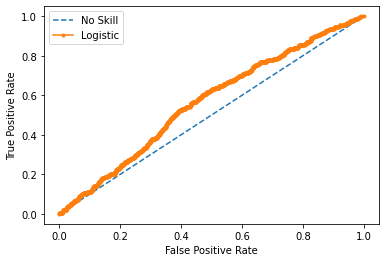

In [ ]:
# keep probabilities for the positive outcome only
x = lc_data[['annual_inc', 'loan_amnt','purpose_types']].values 
#y = lc_data['loan_status_types'].values # 1, means fylly paid
y = lc_data['debt_settlement_flag_types'].values 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0) 
ns_probs = [0 for _ in range(len(ytest))]
classifier = LogisticRegression(solver='lbfgs',random_state = 0) 

classifier.fit(xtrain, ytrain) 
#model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)
lr_probs = classifier.predict_proba(xtest) 

lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(ytest, ns_probs)
lr_auc = roc_auc_score(ytest, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(ytest, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(ytest, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.883


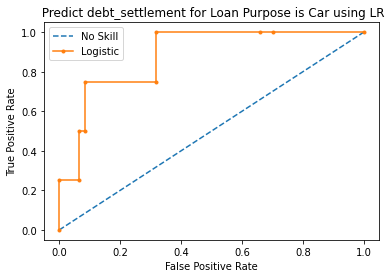

In [ ]:
# keep probabilities for the positive outcome only
#filter=car, LR predict better than , 1% is car
filter=lc_data['purpose']=='car' # adding filter purpose ==car will imporve the model fit prediction

x = lc_data[filter][['annual_inc', 'loan_amnt']].values 
#y = lc_data['loan_status_types'].values # 1, means fylly paid
y = lc_data[filter]['debt_settlement_flag_types'].values 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0) 
ns_probs = [0 for _ in range(len(ytest))]
classifier = LogisticRegression(solver='lbfgs',random_state = 0) 
classifier.fit(xtrain, ytrain) 
#model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)
lr_probs = classifier.predict_proba(xtest) 

lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(ytest, ns_probs)
lr_auc = roc_auc_score(ytest, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(ytest, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(ytest, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.title(" Predict debt_settlement for Loan Purpose is Car using LR")
plt.legend()
# show the plot
plt.show()

In [ ]:
#debt_consolidation    58.870
#credit_card           18.945
pup='medical' #1.47%
filter=lc_data['purpose']==pup # adding filter purpose ==car will imporve the model fit prediction

x = lc_data[filter][['annual_inc', 'loan_amnt']].values 
#y = lc_data['loan_status_types'].values # 1, means fylly paid
y = lc_data[filter]['debt_settlement_flag_types'].values 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0) 
ns_probs = [0 for _ in range(len(ytest))]
classifier = LogisticRegression(solver='lbfgs',random_state = 0) 
classifier.fit(xtrain, ytrain) 
#model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)
lr_probs = classifier.predict_proba(xtest) 

lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(ytest, ns_probs)
lr_auc = roc_auc_score(ytest, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(ytest, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(ytest, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.title(" Predict debt_settlement for Loan Purpose is medical using LR")
plt.legend()
# show the plot
plt.show()

ValueError: ignored

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.550


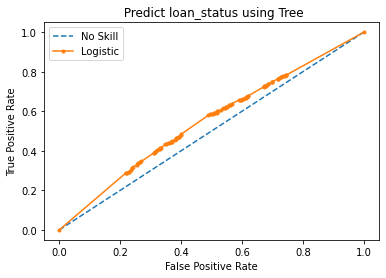

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# keep probabilities for the positive outcome only
x = lc_data[['annual_inc', 'loan_amnt']].values 
y = lc_data['loan_status_types'].values # 1, means fylly paid
#y = lc_data['debt_settlement_flag_types'].values 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0) 
ns_probs = [0 for _ in range(len(ytest))]
classifier = DecisionTreeClassifier() 
classifier.fit(xtrain, ytrain) 
#model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)
lr_probs = classifier.predict_proba(xtest) 

lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(ytest, ns_probs)
lr_auc = roc_auc_score(ytest, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(ytest, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(ytest, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.title(" Predict loan_status using Tree")
plt.legend()
# show the plot
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.718


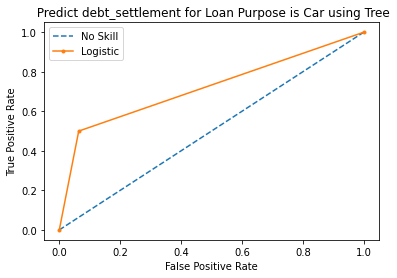

In [ ]:
# keep probabilities for the positive outcome only
filter=lc_data['purpose']=='car' # adding filter purpose ==car will imporve the model fit prediction

x = lc_data[filter][['annual_inc', 'loan_amnt']].values 
#y = lc_data['loan_status_types'].values # 1, means fylly paid
y = lc_data[filter]['debt_settlement_flag_types'].values 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0) 
ns_probs = [0 for _ in range(len(ytest))]
classifier = DecisionTreeClassifier() 
classifier.fit(xtrain, ytrain) 
#model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)
lr_probs = classifier.predict_proba(xtest) 

lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(ytest, ns_probs)
lr_auc = roc_auc_score(ytest, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(ytest, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(ytest, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.title(" Predict debt_settlement for Loan Purpose is Car using Tree")
plt.legend()
# show the plot
plt.show()

In [ ]:
cm = confusion_matrix(ytest, y_pred) 
cm
 
#print ("Accuracy : ", accuracy_score(ytest, y_pred)) #0.90

roc_curve.
fpr, tpr, thresholds = roc_curve(y, probs)


In [ ]:
lc_data['debt_settlement_flag'].value_counts() #1921 Y, 18079 N

100*lc_data['purpose'].value_counts() /lc_data['purpose'].value_counts().values.sum()


debt_consolidation    58.870
credit_card           18.945
other                  7.055
home_improvement       6.685
major_purchase         2.260
medical                1.470
small_business         1.330
car                    1.005
vacation               0.940
moving                 0.825
house                  0.515
renewable_energy       0.100
Name: purpose, dtype: float64

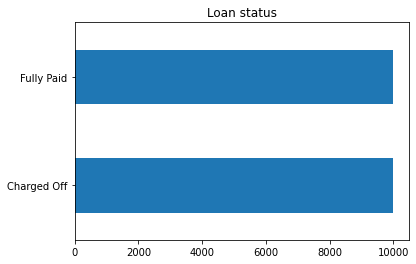

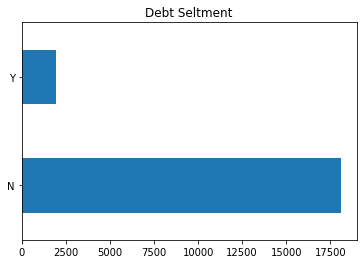

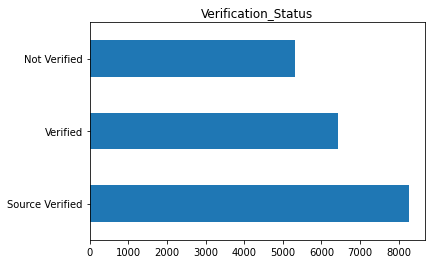

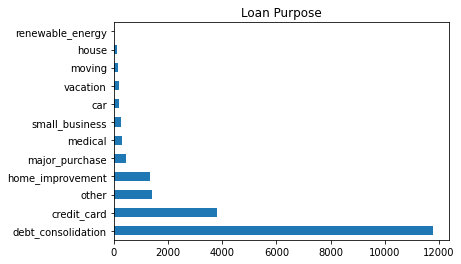

In [ ]:
lc_data.loan_status.value_counts().plot(kind='barh', title='Loan status')
plt.show() 

lc_data['debt_settlement_flag'].value_counts().plot(kind='barh',title='Debt Seltment')
plt.show() 

lc_data['verification_status'].value_counts().plot(kind='barh',title='Verification_Status')
plt.show() 

lc_data['purpose'].value_counts().plot(kind='barh',title='Loan Purpose')
plt.show() 


In [ ]:

#lc_data['purpose'].values
purpose_name=lc_data['purpose'].unique()
def purposedat(dat):
  dat_list=[None]*len(purpose_name)
  #dat_list=[purpose_name]
  for i, purpose in enumerate(purpose_name):
    filter=dat['purpose']==purpose
    dat_list[i]= dat[filter]
  return dat_list

purpose_list=purposedat(lc_data)

purpose_list[1]

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,...,open_rv_24m,max_bal_bc,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag,purpose_types,verification_status_types,application_type_types,debt_settlement_flag_types,loan_status_types
2,25712,93882482,-1.441818,1000.0,1000.0,36 months,15.99%,35.16,C,C5,RENT,0.219404,Source Verified,Dec-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,557xx,MN,0.0,Feb-1999,695.0,699.0,0.0,13.0,0.0,18157.0,27.0,w,0.0,0.0,1000.600733,1000.60,1000.00,0.60,0.0,0.00,0.0000,1002.38,...,1.0,5980.0,18300.0,0.0,2.0,0.0,2.0,4836.0,0.0,0.0,213.0,23.0,10.0,0.0,0.0,8.0,8.0,8.0,10.0,16.0,9.0,11.0,9.0,13.0,0.0,0.0,1.0,100.0,0.0,0.0,56789.0,62872.0,17800.0,38489.0,N,8,1,0,0,1
4,16335,94465406,-1.057411,4500.0,4500.0,36 months,26.24%,181.89,E,E5,RENT,-0.807851,Verified,Dec-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,322xx,FL,0.0,Feb-2012,660.0,664.0,1.0,7.0,1.0,2483.0,7.0,f,0.0,0.0,6534.574960,6534.57,4500.00,2034.57,0.0,0.00,0.0000,181.54,...,3.0,236.0,4200.0,0.0,3.0,1.0,4.0,7191.0,0.0,0.0,31.0,2.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,3.0,4.0,4.0,4.0,7.0,0.0,0.0,1.0,85.7,0.0,0.0,54722.0,50339.0,300.0,50522.0,N,8,2,0,0,1
5,64054,92807532,-0.014022,14000.0,14000.0,36 months,8.24%,440.27,B,B1,MORTGAGE,0.133800,Source Verified,Nov-2016,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,other,925xx,CA,1.0,Jul-2005,705.0,709.0,0.0,16.0,0.0,25092.0,44.0,w,0.0,0.0,2638.410000,2638.41,2100.27,538.14,0.0,0.00,0.0000,440.27,...,4.0,8119.0,46600.0,2.0,0.0,0.0,5.0,22803.0,0.0,0.0,114.0,4.0,4.0,1.0,0.0,4.0,10.0,4.0,5.0,31.0,11.0,12.0,10.0,16.0,0.0,0.0,2.0,94.6,0.0,0.0,482513.0,116421.0,27000.0,93913.0,N,8,1,0,0,0
9,51502,93701622,-1.002496,5000.0,5000.0,36 months,8.24%,157.24,B,B1,MORTGAGE,0.733032,Not Verified,Nov-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,970xx,OR,0.0,Aug-2001,730.0,734.0,0.0,8.0,0.0,15751.0,22.0,w,0.0,0.0,5493.879294,5493.88,5000.00,493.88,0.0,0.00,0.0000,2823.09,...,0.0,4636.0,24600.0,0.0,3.0,0.0,1.0,7114.0,0.0,0.0,183.0,36.0,20.0,3.0,0.0,2.0,5.0,2.0,3.0,12.0,5.0,7.0,5.0,8.0,0.0,0.0,0.0,100.0,0.0,0.0,86744.0,56908.0,11600.0,62144.0,N,8,0,0,0,1
26,11130,95086693,-0.233683,12000.0,12000.0,36 months,12.74%,402.83,C,C1,MORTGAGE,0.048195,Source Verified,Dec-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,891xx,NV,1.0,Jun-2002,680.0,684.0,0.0,12.0,0.0,1929.0,17.0,w,0.0,0.0,14471.624471,14471.62,12000.00,2471.62,0.0,0.00,0.0000,283.89,...,6.0,703.0,9400.0,6.0,0.0,7.0,7.0,14142.0,0.0,0.0,37.0,2.0,2.0,1.0,2.0,3.0,6.0,4.0,5.0,5.0,8.0,9.0,6.0,12.0,0.0,0.0,3.0,92.3,0.0,0.0,238310.0,36160.0,6400.0,70193.0,N,8,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19925,81990,91595360,0.557096,19200.0,19200.0,36 months,14.99%,665.49,C,

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055

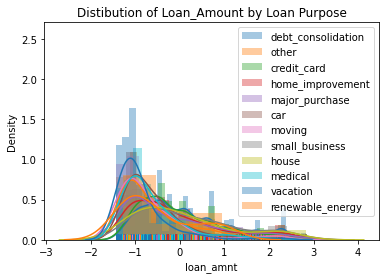

In [ ]:
#purpose_list=purposedat(lc_data)
for i, purpose in enumerate(purpose_name):
  sns.distplot(purpose_list[i]['loan_amnt'], kde=True,rug=True, label=purpose)
plt.title('Distibution of Loan_Amount by Loan Purpose')
plt.legend()
plt.show()  



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


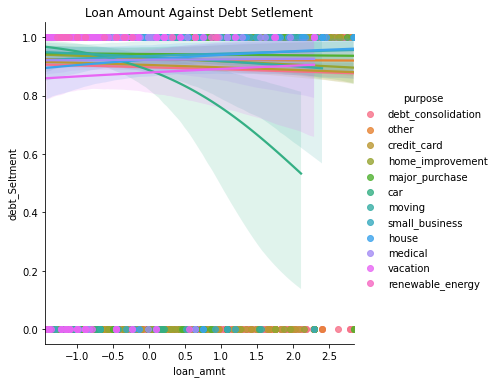

In [ ]:
#lc_data['loan_status'].value_counts()
#lc_data[['loan_amnt','funded_amnt','int_rate']].describe()
#sns.lineplot(x='loan_amnt',y='int_rate', data=lc_data)
#lc_data['int_rate_convert']=lc_data['int_rate'].apply(lambda x: float(x.strip('%')) / 100.0)
lc_data['debt_Seltment']=lc_data['debt_settlement_flag'].apply(lambda x: (x=='N')*1)
#lc_data
#sns.lmplot(x='loan_amnt',y='int_rate', data=lc_data, logistic=True)#not good
#sns.boxplot(x='loan_amnt',y='int_rate_convert', hue='verification_status', data=lc_data)


mu=np.mean(lc_data['annual_inc'])
sd=np.std(lc_data['annual_inc'])

[mu,sd]
lc_data['annual_inc_normal']=lc_data['annual_inc'].apply(lambda x: (x-mu)/sd)

#lc_data
#sns.boxplot(x='loan_amnt',y='annual_inc', hue='verification_status', data=lc_data)

#sns.lineplot(x='loan_amnt',y='annual_inc', hue='verification_status', data=lc_data)

#sns.lmplot(x='annual_inc', y='loan_amnt', data=lc_data,logistic=True)

#sns.lmplot(x='annual_inc', y='debt_Seltment', hue='verification_status', data=lc_data,logistic=True)# 0 means no flag
#sns.lmplot(x='annual_inc', y='debt_Seltment',  data=lc_data,logistic=True)
#sns.lmplot(x='annual_inc_normal', y='debt_Seltment',  data=lc_data, logistic=True)# 0 means no flag
sns.lmplot(x='loan_amnt', y='debt_Seltment', hue='purpose' , data=lc_data,logistic=True)# 0 means no flag
plt.title("Loan Amount Against Debt Setlement")
plt.show()


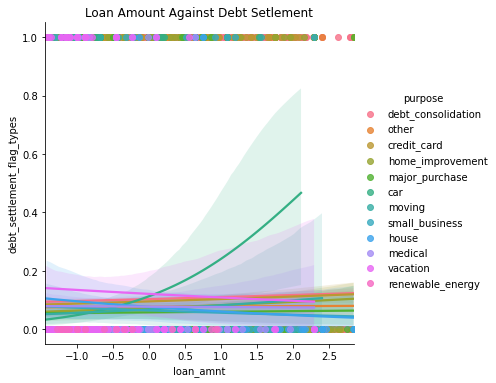

In [ ]:
sns.lmplot(x='loan_amnt', y='debt_settlement_flag_types', hue='purpose' , data=lc_data,logistic=True)# 0 means no flag
plt.title("Loan Amount Against Debt Setlement")
plt.show()

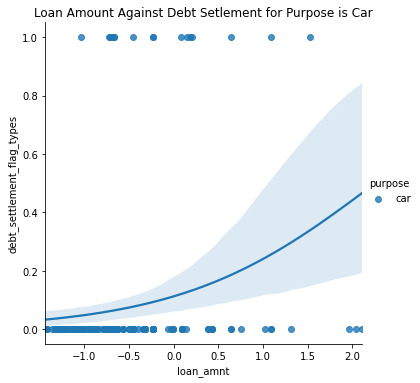

In [ ]:
filter=lc_data['purpose']=='car'

sns.lmplot(x='loan_amnt', y='debt_settlement_flag_types', hue='purpose' , data=lc_data[filter],logistic=True)# 0 means no flag
plt.title("Loan Amount Against Debt Setlement for Purpose is Car")
plt.show()